## Objectif
Depuis une feature1 et une feature2 on doit être capable de detecter le price

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Chargement des données

In [148]:
df = pd.read_csv("fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Exploration des données

Jetons un coup d'œil rapide, nous devrions constater une forte corrélation entre les caractéristiques (features) et le "prix" de ce produit composé.

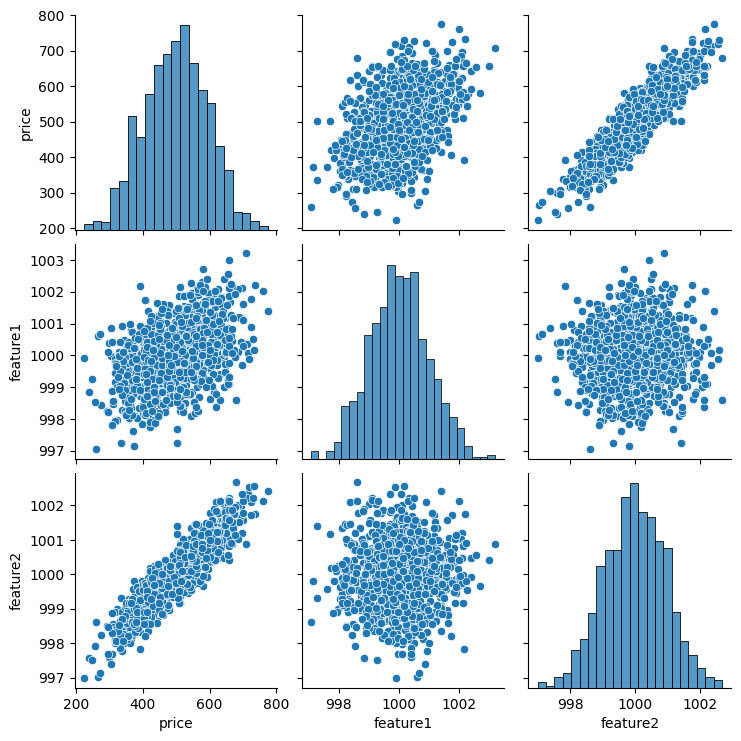

In [149]:
# Montrer sous forme de graphique les relations deux à deux entre les variables (dans ce cas, 'price', 'feature1', 'feature2')
sns.pairplot(df);

## Répartition Entraînement / Test (Train / Test)

In [152]:
X = df[['feature1', 'feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)

(700, 2)
(300, 2)


## Normalisation

La normalisation les ramène à une échelle commune, disons de 0 à 1. Cela aide l'algorithme à mieux comprendre et à travailler avec ces données, en évitant que des caractéristiques avec des valeurs plus grandes dominent celles avec des valeurs plus petites. 

In [154]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3])
print(X_test[:3])

[[0.22179862 0.55212838]
 [0.34106018 0.45061693]
 [0.44187649 0.6432228 ]]
[[0.32203602 0.91084715]
 [0.82355331 0.38462938]
 [0.34415736 0.62919178]]


## Création du modèle

In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Choosing an optimizer and loss
```py
# Pour un problème de classification multi-classe où l'on classe les données dans plusieurs catégories (ex: chien, chat, souris etc...)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Pour un problème de classification binaire où l'on classe les données dans deux catégories (ex: spam ou pas)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Pour un problème de régression où l'on veut prédire une valeur continue (ex: le prix d'une maison),
model.compile(optimizer='adam', loss='mse', metrics = ['mse'])
```

In [167]:
mode = Sequential()
mode.add(Dense(4, activation='relu')) # couche d'entrée avec 4 neurones
mode.add(Dense(4, activation='relu')) # couche cachée avec 4 neurones
mode.add(Dense(4, activation='relu')) # couche cachée avec 4 neurones
mode.add(Dense(1)) # couche de sortie avec 1 neurone

model.compile(optimizer='adam', loss='mse', metrics = ['mae']) # le loss est déjà le mse par défaut, on peut le laisser

In [168]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 24        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entraînement du modèle

In [169]:
# Entraîne le modèle sur les données d'entraînement avec validation
# - epochs=250 : Le nombre de fois où le modèle ajuste ses paramètres internes (poids et biais) en fonction de toutes les données d'entraînement.
#   Chaque époque est une itération complète à travers l'ensemble d'entraînement.
#   Plus d'époques permettent au modèle d'apprendre des modèles plus complexes et d'avoir moins d'erreurs
# - validation_data=(X_val, y_val) : Les données de validation utilisées pour évaluer la performance du modèle à chaque époque.
history = model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test))

Epoch 1/250
22/22 [==============================] - 1s 10ms/step - loss: 987.2500 - mae: 25.2637 - val_loss: 955.9833 - val_mae: 24.6106
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 959.3083 - mae: 24.9317 - val_loss: 941.6567 - val_mae: 24.4019
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 939.1759 - mae: 24.6740 - val_loss: 914.9924 - val_mae: 24.0603
Epoch 4/250
22/22 [==============================] - 0s 4ms/step - loss: 915.8179 - mae: 24.3488 - val_loss: 893.2126 - val_mae: 23.7673
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 892.8420 - mae: 24.0416 - val_loss: 871.1322 - val_mae: 23.4678
Epoch 6/250
22/22 [==============================] - 0s 5ms/step - loss: 872.1313 - mae: 23.7438 - val_loss: 850.2192 - val_mae: 23.1789
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 848.6282 - mae: 23.4597 - val_loss: 830.8894 - val_mae: 22.9120
Epoch 8/250
22/22 [=====================

## Evaluation

Évaluons nos performances sur notre ensemble d'entraînement et sur notre ensemble de test. Nous pouvons comparer ces deux performances pour vérifier qu'il n'y a pas d'overfitting (ou sur-apprentissage).

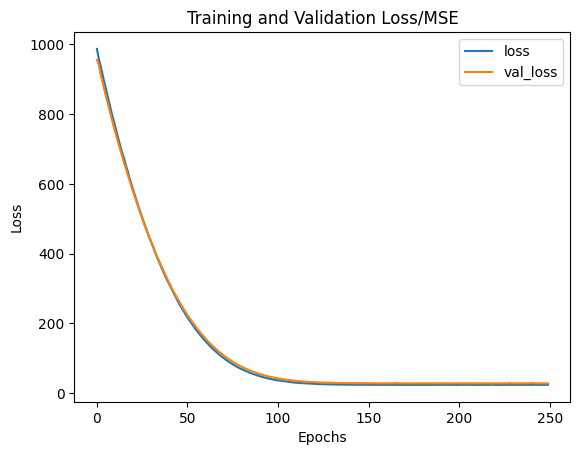

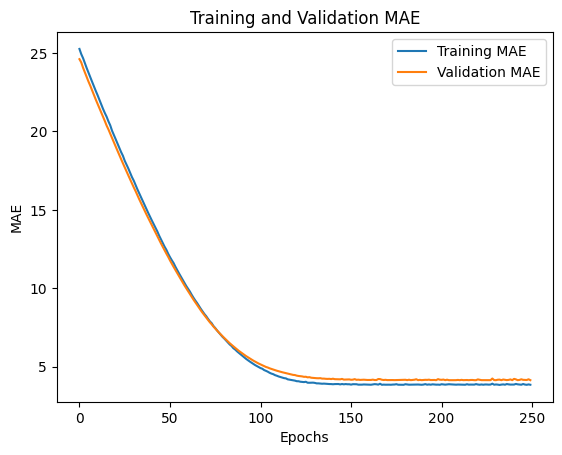

In [172]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss/MSE')
plt.legend()
plt.show()

# Plot the training and validation mae over epochs
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()



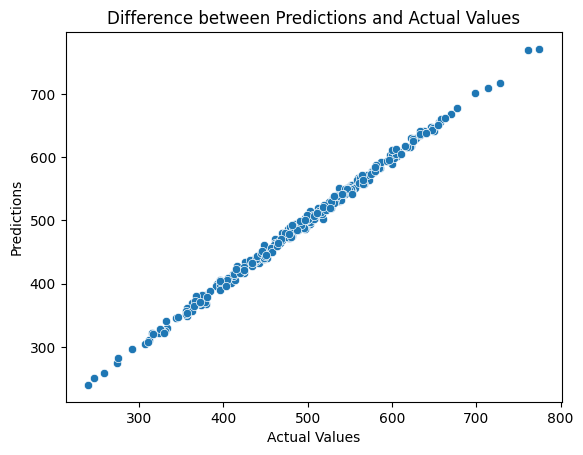

In [177]:
# Create a scatter plot to visualize the difference between predictions and actual values
sns.scatterplot(x=y_test.flatten(), y=predictions.flatten())
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Difference between Predictions and Actual Values')
plt.show()

# Si ma prédiction est égale à la valeur réelle, alors la ligne serait droite, donc plus le résultat se rapproche d'une droite, plus les prédictions sont bonnes

## Sauvegarde

In [175]:
from tensorflow.keras.models import load_model
model.save("my_model.keras")
mode = load_model("my_model.keras") 

In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


10/10 [==============================] - 0s 2ms/step
MAE: 4.143858967872013
MSE: 27.28121248857665
RMSE: 5.223142013058486


In [178]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
# On remarque sur le describe que le prix moyen est de 500 et que le prix minimum est 223 et max 774. et notre mae est de 4.1 cela veut dire qu'on est environ à 1% d'erreur de la moyenne du prix.

On remarque sur le describe que le prix moyen est de 500 et que le prix minimum est 223 et max 774. et notre mae est de 4.1 cela veut dire qu'on est environ à 1% d'erreur de la moyenne du prix.

## Prédire sur de toutes nouvelles données

Et si nous voyions une toute nouvelle pierre précieuse sortir de terre ? À quel prix devrions-nous la vendre ? C'est l'**exacte** même procédure que de prédire sur de nouvelles données de test !

In [180]:
# Preprocess the input data
input_data = np.array([[998, 1000]])
input_data = scaler.transform(input_data) # normalisée car on a aussi normalisé les données d'entraînement

# Make predictions
predictions = model.predict(input_data)

# Print the predictions
print(predictions)


1/1 [==============================] - 0s 45ms/step
[[744928.94]]
